# EDA & Data Analysis.

### The Snoop Dog Status  Case.

![](snoop.jpeg)



In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)



#!pip install plotly
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#pip install missingno

In [3]:
# import missingno
import missingno as msno
from datetime import datetime
import math
import seaborn as sns
#!pip install -U kaleido


# Client: Seller
### - Invests in historical houses, 
### - best neighborhoods, 
### - high profits, 
### - best timing within a year, should renovate?


# HIPOTHESYS

 ## 1. As suggests Snoop Dogg in The Sandbox, very valuable houses create Hubs of Status and impact the neighborhood price.
 
 ## 2. The higher profits may be in the borders with houses on even better conditions by half the price.

 ## 3. If Mr Brooks thinks the best timing is one year, maybe instead of renovating, it is better to find a house in good condition and close to a price outlier.

In [4]:
data= pd.read_csv('eda.csv')

In [5]:
df= data.copy()

In [6]:
df.head()

sales_id        date    house_id      price          id  bedrooms  \
0         1  2014-10-13  7129300520 221900.000  7129300520     3.000   
1         2  2014-12-09  6414100192 538000.000  6414100192     3.000   
2         3  2015-02-25  5631500400 180000.000  5631500400     2.000   
3         4  2014-12-09  2487200875 604000.000  2487200875     4.000   
4         5  2015-02-18  1954400510 510000.000  1954400510     3.000   

   bathrooms  sqft_living  sqft_lot  floors  ...  grade  sqft_above  \
0      1.000     1180.000  5650.000   1.000  ...      7    1180.000   
1      2.250     2570.000  7242.000   2.000  ...      7    2170.000   
2      1.000      770.000 10000.000   1.000  ...      6     770.000   
3      3.000     1960.000  5000.000   1.000  ...      7    1050.000   
4      2.000     1680.000  8080.000   1.000  ...      8    1680.000   

   sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0          0.000      1955         0.000    98178 47.511 -122.257   
1        400.000      1951     19910.000    98125 47.721 -122.319   
2          0.000      1933           NaN    98028 47.738 -122.233   
3        910.000      1965         0.000    98136 47.521 -122.393   
4          0.000      1987         0.000    98074 47.617 -122.045   

   sqft_living15  sqft_lot15  
0       1340.000    5650.000  
1       1690.000    7639.000  
2       2720.000    8062.000  
3       1360.000    5000.000  
4       1800.000    7503.000  

[5 rows x 23 columns]

## Check missing values and EDA


<Axes: >

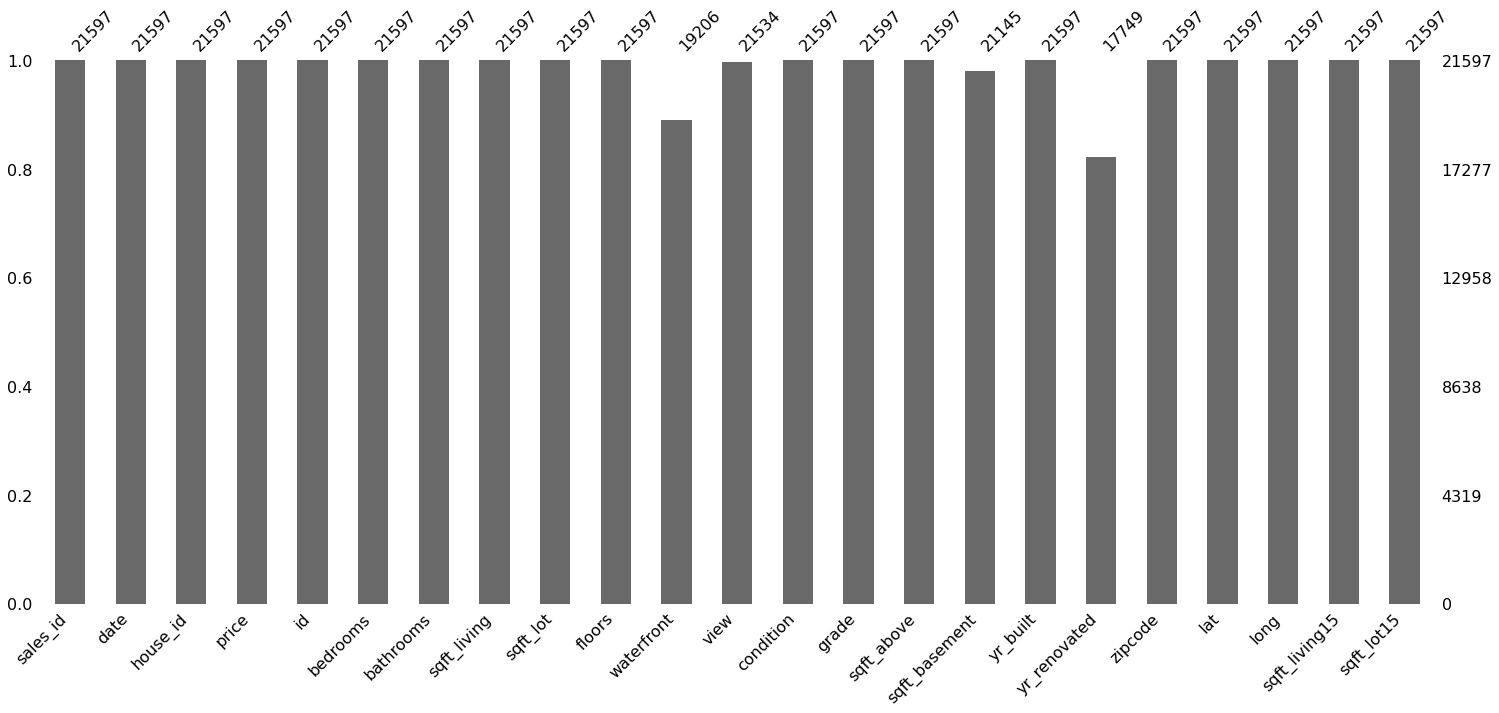

In [10]:
msno.bar(df)

## How many NaN

In [11]:
data.isna().sum()

sales_id            0
date                0
house_id            0
price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Sort according to grades

In [12]:

df_sorted = df.sort_values("grade", ascending=False)
df_sorted.head(5)

sales_id        date    house_id       price          id  bedrooms  \
9245       9246  2014-09-19  9208900037 6890000.000  9208900037     6.000   
6035       6036  2014-11-20  1725059316 2390000.000  1725059316     4.000   
13398     13399  2015-01-30  2426039123 2420000.000  2426039123     5.000   
4407       4408  2014-08-04  2470100110 5570000.000  2470100110     5.000   
10362     10363  2014-12-12  3303850390 2980000.000  3303850390     5.000   

       bathrooms  sqft_living  sqft_lot  floors  ...  grade  sqft_above  \
9245       7.750     9890.000 31374.000   2.000  ...     13    8860.000   
6035       4.000     6330.000 13296.000   2.000  ...     13    4900.000   
13398      4.750     7880.000 24250.000   2.000  ...     13    7880.000   
4407       5.750     9200.000 35069.000   2.000  ...     13    6200.000   
10362      5.500     7400.000 18898.000   2.000  ...     13    6290.000   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
9245        1030.000      2001         0.000    98039 47.630 -122.240   
6035        1430.000      2000         0.000    98033 47.649 -122.201   
13398          0.000      1996         0.000    98177 47.733 -122.362   
4407        3000.000      2001           NaN    98039 47.629 -122.233   
10362       1110.000      2001         0.000    98006 47.543 -122.112   

       sqft_living15  sqft_lot15  
9245        4540.000   42730.000  
6035        2200.000    9196.000  
13398       2740.000   10761.000  
4407        3560.000   24345.000  
10362       6110.000   26442.000  

[5 rows x 23 columns]

## From sorted I pick the ones corresponding to the top 20% of grades

In [13]:

cut=round(0.2* len(df))
df_sorted_cuted = df_sorted.head(cut)
len( df_sorted_cuted)

4319

In [14]:
# Here I check the number of rows corresponding to the top 20% of grades, just to double check 
top_20_percent = round(0.20 * len(df_sorted))

top_20_percent

4319

## General view of the King County

In [40]:

fig = px.scatter_mapbox(
                        df_sorted,
                        lat='lat',
                        lon="long",
                        opacity =0.5,
                        zoom = 8,
                        mapbox_style='open-street-map',
                        color='price',
                        size='price', 
                        hover_name='id',
                        hover_data={'zipcode':True,
                                    'grade':True,
                                    'condition':True,
                                    'yr_built': True
                                    },
                        #template = 'plotly_dark'
)



fig.update_layout(
    width=999,
    height=900,
    title_font_size=18,
    margin=dict(l=0, r=0, t=100, b=0),  # Increase top margin
    title={
        'text': "<b> All houses in King County. Price represented in Color and Size </b>",  # Bold title
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)





![](all_houses.png)

## Top 20% prices

In [41]:
# Top 20% prices 


# Dark blue color scale with reduced variance
dark_blue_scale = [
    [0, 'rgb(70, 130, 180)'],    # Steel blue
    [0.4, 'rgb(0, 0, 205)'],     # Medium blue
    [0.6, 'rgb(0, 0, 139)'],     # Dark blue
    [0.8, 'rgb(25, 25, 112)'],   # Midnight blue
    [1, 'rgb(0, 0, 70)']         # Very dark blue
]

#  the scatter mapbox plot from lat & long
fig = px.scatter_mapbox(
    df_sorted_cuted,
    lat='lat',
    lon="long",
    opacity=0.8,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price', 
    color_continuous_scale=dark_blue_scale,
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True}
)

# layout properties
fig.update_layout(
    width=999,
    height=900,
    title_font_size=20,
    margin=dict(l=0, r=0, t=100, b=0),
    title={
        'text': "<b>Top 20 % price houses in King County</b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


fig.write_image("output_plot_20_percent.png", engine="kaleido", scale=5)


![](all_top_20.png)

In [17]:
#pip install -U kaleido

## Price vs Grade plus View as color and Condition as size

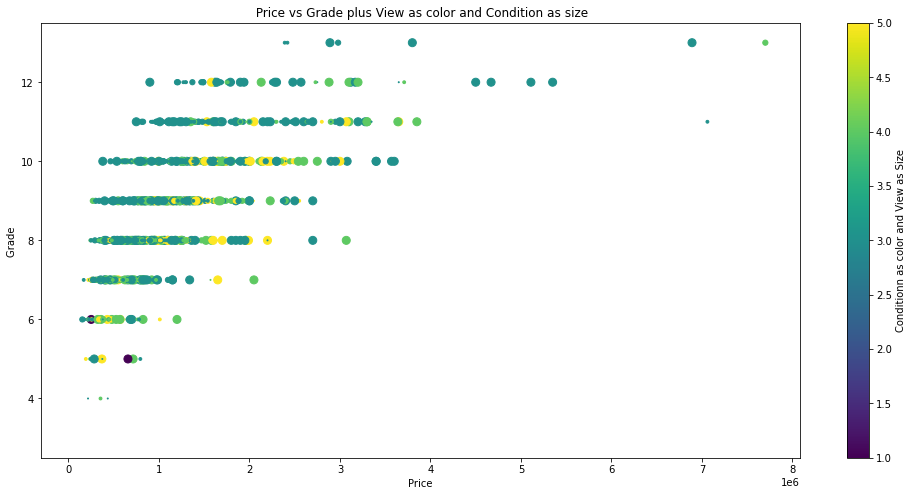

In [18]:


#sqr_list_grade = [round(math.sqrt(x),2) for x in df_top_05.grade.tolist()]
#sqr_list_condition = [round(math.sqrt(x),2) for x in df_top_05.condition.tolist()]

#grade_condition = np.array(sqr_list_condition) + np.array(sqr_list_grade)
plt.figure(figsize=(17, 8))
# scatter plot
plt.scatter(df.price, df.grade, c=df.condition, cmap='viridis', s = df.view**3   )

# labels and title
plt.xlabel('Price')
plt.ylabel('Grade ')
plt.title(' Price vs Grade plus View as color and Condition as size')

# the colorbar
plt.colorbar(label='Conditionn as color and View as Size')


plt.show()


### 20 % Highes price Houses: Price vs Grade plus Condition as color and View as size

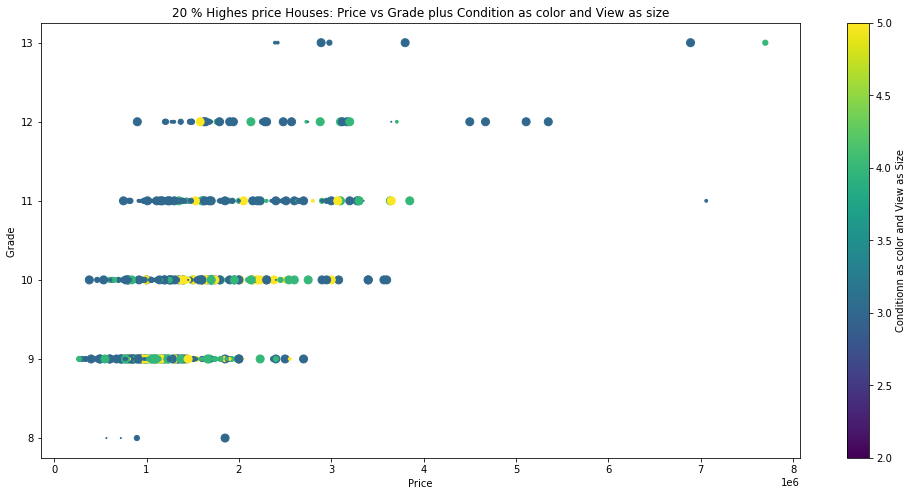

In [19]:


#sqr_list_grade = [round(math.sqrt(x),2) for x in df_top_05.grade.tolist()]
#sqr_list_condition = [round(math.sqrt(x),2) for x in df_top_05.condition.tolist()]



#grade_condition = np.array(sqr_list_condition) + np.array(sqr_list_grade)
plt.figure(figsize=(17, 8))
# Scatter plot
plt.scatter(df_sorted_cuted.price, df_sorted_cuted.grade, c=df_sorted_cuted.condition, cmap='viridis', s = df_sorted_cuted.view**3   )

# labels and title
plt.xlabel('Price')
plt.ylabel('Grade ')
plt.title('20 % Highes price Houses: Price vs Grade plus Condition as color and View as size')

#  the colorbar
plt.colorbar(label='Conditionn as color and View as Size')


plt.show()



### Top 20% Price vs Grade plus View as color and Condition as size

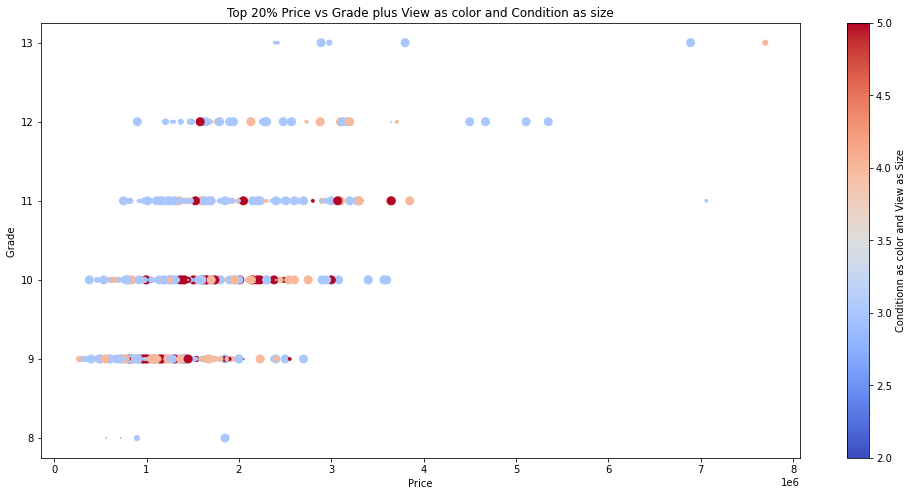

In [21]:



#grade_condition = np.array(sqr_list_condition) + np.array(sqr_list_grade)
plt.figure(figsize=(17, 8))
# scatter plot
plt.scatter(df_top_10.price, df_top_10.grade, c=df_top_10.condition, cmap='coolwarm', s = df_top_10.view**3   )

#  labels and title
plt.xlabel('Price')
plt.ylabel('Grade ')
plt.title('Top 20% Price vs Grade plus View as color and Condition as size')

# the colorbar
plt.colorbar(label='Conditionn as color and View as Size')


plt.show()



### Top 20% Price (built before 1950) vs Grade plus View as color and Condition as size

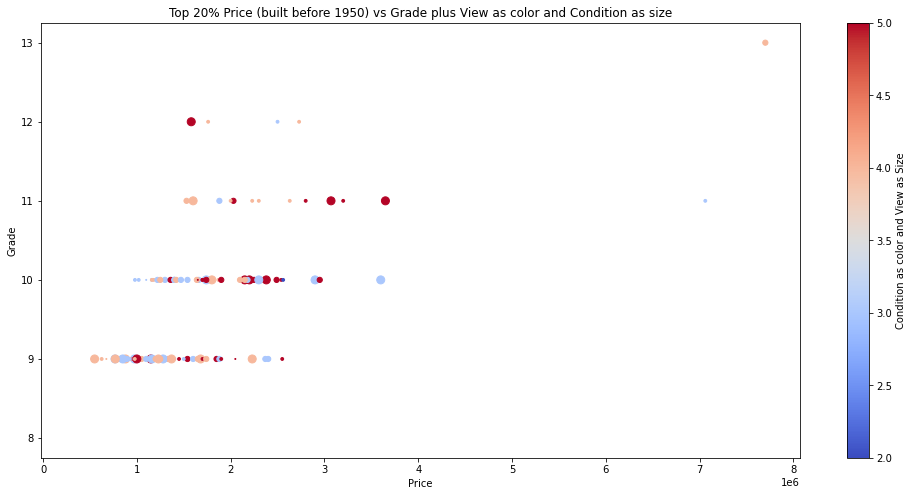

In [22]:

filtered_df = df_top_10[df_top_10['yr_built'] < 1950]

plt.figure(figsize=(17, 8))
plt.scatter(filtered_df.price, filtered_df.grade, c=filtered_df.condition, cmap='coolwarm', s=filtered_df.view**3)

#  labels and title
plt.xlabel('Price')
plt.ylabel('Grade')
plt.title('Top 20% Price (built before 1950) vs Grade plus View as color and Condition as size')

# no the colorbar
plt.colorbar(label='Condition as color and View as Size')

plt.show()


### Just visualizing better the Grade 10 of Top 20% Price (built before 1950) vs Condition 

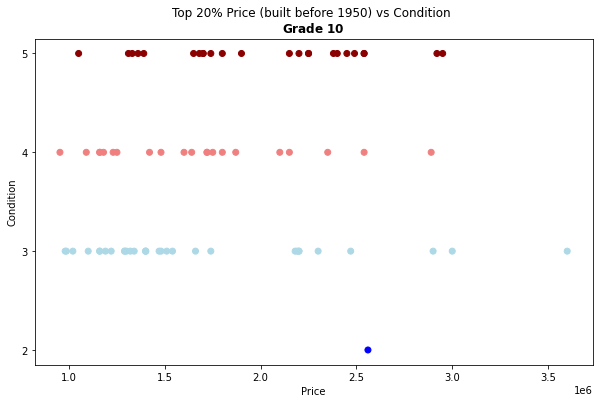

In [23]:



filtered_df = df_top_10[(df_top_10['yr_built'] < 1950) & (df_top_10['grade'] == 10)]

# scatter plot with custom colors for conditions 2, 3, and 4
colors = np.where(filtered_df['condition'] == 2, 'blue', np.where(filtered_df['condition'] == 3, 'lightblue', np.where(filtered_df['condition'] == 4, 'lightcoral', 'darkred')))

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['price'], filtered_df['condition'], marker='o', c=colors)

# abels and title
plt.xlabel('Price')
plt.ylabel('Condition')
plt.title('Top 20% Price (built before 1950) vs Condition \n'
          r'$\bf{Grade\ 10}$')

#  y-axis ticks to include only integer values
plt.yticks(range(int(filtered_df['condition'].min()), int(filtered_df['condition'].max()) + 1))

# no the color bar
plt.colorbar().remove()


plt.show()






## Houses in King County with Grade 10, Yr_built < 1950, Condition >= 3 

In [43]:


filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'] == 10) & (df_sorted_cuted['yr_built'] < 1950) & (df_sorted_cuted['condition'] >= 3)]

# include condition 10
filtered_df_condition_10 = df_sorted_cuted[(df_sorted_cuted['grade'] == 10) & (df_sorted_cuted['yr_built'] < 1950) & (df_sorted_cuted['condition'] == 10)]

# concatenate the DataFrames
filtered_df = pd.concat([filtered_df, filtered_df_condition_10])

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.5,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price',  # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True},
    color_continuous_scale=[
        (0.1, 'purple'),
        (0.5, 'red'),
        (1, 'darkred')
    ],
)

#  height, width, margins, and other layout properties
fig.update_layout(
    width=999,
    height=900,
    title_font_size=20,
    margin=dict(l=0, r=0, t=60, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b>Houses in King County Grade 10, Yr_built < 1950, Condition >= 3 <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


![](grade_10_old_cond_3.png)


## Houses in King County with Grade 9,10,11 Yr_built < 1950, Condition >= 3 

In [27]:


filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'].isin([9, 10, 11])) & 
                              (df_sorted_cuted['yr_built'] < 1950) & 
                              (df_sorted_cuted['condition'] >= 3)]

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.5,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price',  # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_continuous_scale=[
        (0.1, 'purple'),
        (0.5, 'red'),
        (1, 'darkred')
    ],
)

#  height, width, margins, and other layout properties
fig.update_layout(
    width=999,
    height=900,
    title_font_size=20,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> House prices with Grade 9, 10 and 11, built before 1950, Condition >= 3 <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


![](grade_9_10_11_old_cond_3.png)

### Prices distribution in King County regardles of condition or age

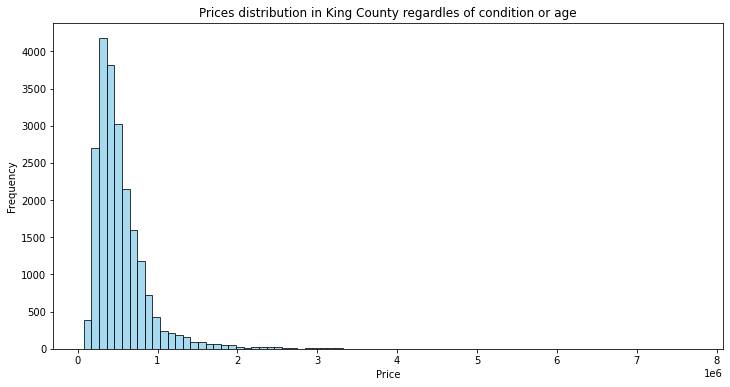

In [28]:

plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['price'], bins=80, color='skyblue', edgecolor='black')

#  labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Prices distribution in King County regardles of condition or age')


plt.show()


### Distribution of the 20 % highest prices regardles of condition or age

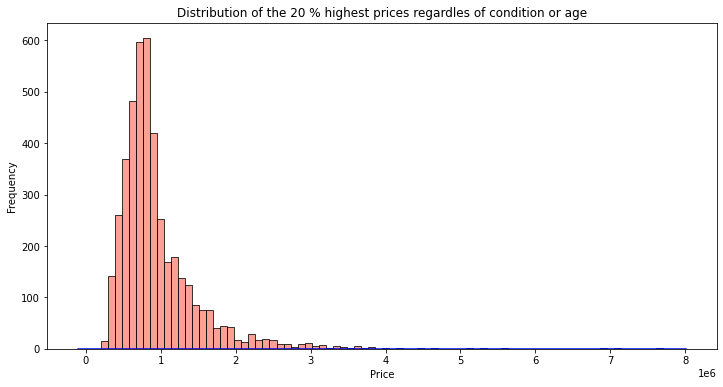

In [29]:

plt.figure(figsize=(12, 6))

# the histogram with custom colors
sns.histplot(df_sorted_cuted['price'], bins=80, color='salmon', edgecolor='black')

# KDE line in blue
sns.kdeplot(df_sorted_cuted['price'], color='blue')

#  labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of the 20 % highest prices regardles of condition or age')


plt.show()


## Plot and identify the THRESHOLD of highest prices of Upper Limit (1.5*IQR) over 20% highest, Condition >= 3, built before 1950, and Grades 9, 10 and 11

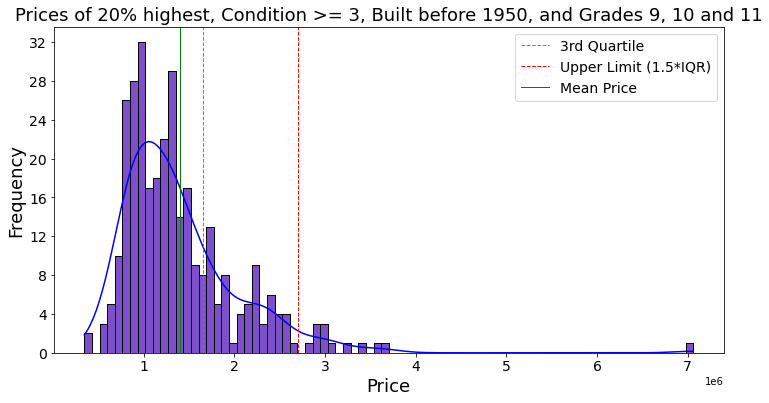

In [30]:

plt.figure(figsize=(12, 6))

# filtering condition for filtered_df
filtered_df = df_sorted_cuted[(df_sorted_cuted['condition'] >= 3) & 
                               (df_sorted_cuted['yr_built'] < 1950) &
                               (df_sorted_cuted['grade'].isin([9, 10, 11]))]

#  histogram with custom colors
sns.histplot(filtered_df['price'], bins=80, color='salmon', edgecolor='black')

# KDE line in blue
sns.histplot(filtered_df['price'], bins=80, kde=True, color='blue', linewidth=1)

#  the mean price
mean_price = filtered_df['price'].mean()

# the 3rd quartile and interquartile range (IQR)
third_quartile = filtered_df['price'].quantile(0.75)
first_quartile = filtered_df['price'].quantile(0.25)
iqr = third_quartile - first_quartile

#  the upper limit for outliers
upper_limit = third_quartile + 1.5 * iqr

#  grey dashed vertical lines for the 3rd quartile and upper limit
plt.axvline(x=third_quartile, color='grey', linestyle='dashed', linewidth=1, label='3rd Quartile')
plt.axvline(x=upper_limit, color='red', linestyle='dashed', linewidth=1, label='Upper Limit (1.5*IQR)')

#  solid green vertical line for the mean price
plt.axvline(x=mean_price, color='green', linestyle='solid', linewidth=1, label='Mean Price')

# changing font sizes
xlabel_fontsize = 18
ylabel_fontsize = 18
title_fontsize = 18
legend_fontsize = 14  # Adjust this value as needed
legend_fontsize = 14  # Adjust this value as needed
axis_ticks_fontsize = 14  # Font size for axis ticks

plt.xlabel('Price', fontsize=xlabel_fontsize)
plt.ylabel('Frequency', fontsize=ylabel_fontsize)
plt.title('Prices of 20% highest, Condition >= 3, Built before 1950, and Grades 9, 10 and 11', fontsize=title_fontsize)

#  y-axis ticks to include only integer values at intervals of 2
plt.yticks(range(int(plt.ylim()[0]), int(plt.ylim()[1]) + 1, 4))

# adjust font size for x-axis and y-axis tick labels
plt.tick_params(axis='x', labelsize=axis_ticks_fontsize)
plt.tick_params(axis='y', labelsize=axis_ticks_fontsize)

# the plot with adjusted legend font size
plt.legend(fontsize=legend_fontsize)
plt.show()



# Now that I have an idea of what can be the CENTROIDS by finding the really high valued houses from the plot above, I'll plot in the map where are these centroids which are > 2.75M, condition >= 3, built < 1950 and grad 9,10,11


In [31]:
# Plotting the CENTROIDS

filtered_df = df_sorted_cuted[(df_sorted_cuted['grade'].isin([9, 10, 11])) & 
                              (df_sorted_cuted['yr_built'] < 1950) & 
                              (df_sorted_cuted['condition'] >= 3) & 
                              (df_sorted_cuted['price'] > 2750000)]

fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    opacity=0.5,
    zoom=8,
    mapbox_style='open-street-map',
    color='price',
    size='price',  # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True},
    color_continuous_scale=[
        (0.1, 'purple'),
        (0.5, 'red'),
        (1, 'darkred')
    ],
)

# height, width, margins, and other layout properties
fig.update_layout(
    width=999,
    height=900,
    title_font_size=20,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> 20% highest, Grade 9, 10 & 11, built before < 1950, Condition >= 3, $ > 2.75M <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


![](grade_9_10_11_old_cond_3_2.75M.png)

## Now that I have the centroids, lets see the satelites houses around it. I compute this by finding which houses BELOW 2.75M which are closest to one of the CENTROIDS and NOT to all the others.

## First I create a df with all the distances between all houses


In [33]:

# 1st make a ondition filter
condition_filter = (df_sorted_cuted['grade'].isin([9, 10, 11])) & \
                   (df_sorted_cuted['yr_built'] < 1950) & \
                   (df_sorted_cuted['condition'] >= 3)

# Separate houses above and below $2,750,000 with additional condition filter
df_above = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] > 2750000)]
df_below = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] <= 2750000)]

# a function to convert lat and long into km
def haversine(lat1, lon1, lat2, lon2):
    # radius of the Earth in kilometers
    R = 6371.0
    
    # convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # compute differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # distance in kilometers
    distance = R * c
    
    return distance

# calculate distances and add corresponding lat and long
distances = []
for idx_below, house_below in df_below.iterrows():
    for idx_above, house_above in df_above.iterrows():
        distance = haversine(house_below['lat'], house_below['long'], house_above['lat'], house_above['long'])
        distances.append({
            'house_below': house_below['sales_id'],
            'house_above': house_above['sales_id'],
            'distance_km': distance,
            'lat': house_below['lat'],
            'long': house_below['long']
        })

# convert distances to DataFrame
distances_df = pd.DataFrame(distances)

# the resulting DataFrame
distances_df




house_below  house_above  distance_km    lat     long
0            4215         7185        6.369 47.670 -122.416
1            4215        11964       10.188 47.670 -122.416
2            4215        15245        5.979 47.670 -122.416
3            4215        10436       10.223 47.670 -122.416
4            4215        11609        2.772 47.670 -122.416
...           ...          ...          ...    ...      ...
3934        14450        18315        5.438 47.577 -122.285
3935        14450         6397        4.666 47.577 -122.285
3936        14450        18542        9.351 47.577 -122.285
3937        14450         2898        9.578 47.577 -122.285
3938        14450        14018        5.793 47.577 -122.285

[3939 rows x 5 columns]

## <b>Here is an important step.<b> 
## Now that I have all distances between all houses, I build a dictionary with _keys_ as the ids of the centroids and _values_ as the ids of the <b>houses which are more close to ONE centroid than any other centroid<b>.

In [34]:

# unique house_below_ids and house_above_ids in relation to centroids (houses_above)
house_below_ids = distances_df['house_below'].unique()
house_above_ids = distances_df['house_above'].unique()

#  empty dictionary to store results
smallest_distances_dict = {}

# here I loop through house_below_ids
for house_below_id in house_below_ids:
    # initialize variables to track the smallest distance and corresponding house_above sales_id
    smallest_distance = float('inf')
    closest_house_above_id = None

    # Loop through house_above_ids
    for house_above_id in house_above_ids:
        # find the distance for the current house_below_id and house_above_id
        current_distance = distances_df.loc[(distances_df['house_below'] == house_below_id) & 
                                            (distances_df['house_above'] == house_above_id), 
                                            'distance_km'].values[0]

        # update the smallest_distance and closest_house_above_id if the current distance is smaller
        if current_distance < smallest_distance:
            smallest_distance = current_distance
            closest_house_above_id = house_above_id
    
    # keep the sales_id of the closest house_below for the corresponding house_above in the dictionary
    if closest_house_above_id not in smallest_distances_dict:
        smallest_distances_dict[closest_house_above_id] = []
    smallest_distances_dict[closest_house_above_id].append(house_below_id)

# the dictionary containing the results
print(smallest_distances_dict)





{11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 15245: [15540, 3583, 1834, 18395, 12188, 16601, 313, 16931, 10848, 2982, 2827, 15141, 9620, 9187, 5613, 3861, 5743, 19262, 15780, 4247, 86, 17547, 12842, 497, 13747, 640, 2240, 2366, 16976, 24

## Then I plot centroids in red and satelites in blue

In [36]:

# 1st I determine the filter over sorted and cuted data
condition_filter = (df_sorted_cuted['grade'].isin([9, 10,11])) & \
                   (df_sorted_cuted['yr_built'] < 1950) & \
                   (df_sorted_cuted['condition'] >= 3)

filtered_df_above = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] > 2750000)]
filtered_df_below = df_sorted_cuted[condition_filter & (df_sorted_cuted['price'] <= 2750000)]

# here I add a new column with a constant value for color
filtered_df_above['color'] = 'centroid'
filtered_df_below['color'] = 'satellite'

fig = px.scatter_mapbox(
    pd.concat([filtered_df_above, filtered_df_below]),
    lat='lat',
    lon='long',
    opacity=0.5,  # Set opacity for all spheres
    zoom=8,
    mapbox_style='open-street-map',
    color='color',  # Set color to the new 'color' column
    size='price',   # Set size to the 'price' column
    hover_name='id',
    hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
    color_discrete_map={'centroid': 'red', 'satellite': 'blue'}  # Set color to red and blue
)

# Updating height, width, margins, and other layout properties
fig.update_layout(
    width=999,
    height=900,
    title_font_size=20,
    margin=dict(l=0, r=0, t=100, b=0),  # Set margins to zero (pixels)
    title={
        'text': "<b> 20% highest, Grade 9, 10 and 11, built < 1950, Cond. >= 3, Centroids and Satelites <b>",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

![](centr_&_satelites.png)

## Now I want to visualize the specific centroids' and their respective satelites' IDs. 
## For this, I hovered over the clusters identifying where were, among the centroids (red big circles in the map), the keys of the dictionaire, held in the variable <b>smallest_distances_dict_<b>.
## For instance,the first one is the key 11609 and is the district of 'Magnolia', and the values for this key are the ids of the satelite. Below I show smallest_distances_dict just to provide a visual reference.

In [111]:
smallest_distances_dict
    11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 
    7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 
    6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 
    2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 
    14018: [16707, 14084, 15654, 6190, 19258, 1816, 5698, 7646, 3382, 1986, 1943, 15345, 11563, 3732, 18617, 3151, 3405, 2919, 5384, 16351, 17227, 12645, 14001, 6451, 17164, 1705, 14243, 13479, 6765, 6778, 14959, 11844], 
    15245: [15540, 3583, 1834, 18395, 12188, 16601, 313, 16931, 10848, 2982, 2827, 15141, 9620, 9187, 5613, 3861, 5743, 19262, 15780, 4247, 86, 17547, 12842, 497, 13747, 640, 2240, 2366, 16976, 2465], 
    10436: [1944, 14173, 3858, 5665, 18362, 6004, 3008, 10626, 9600, 4856, 9658, 3928, 9869, 944, 11759], 
    6397: [17967, 16881, 8776, 7880, 4632, 18195, 19039, 18388, 3894, 14274, 13346, 13271, 2073, 1831, 11833], 
    18542: [1432, 8146, 19054, 18868, 4208, 15036, 3102, 4677, 18589, 15911, 18661, 18701, 18814, 19532, 10423, 4186, 19256, 9628, 4033, 13958, 1049, 7354, 7159, 739, 473, 7734, 11505, 14700, 11477, 14910, 6104, 11204], 
    11964: [18754, 3336, 7277, 13944, 10488, 3101, 18941, 8992, 4874, 9848, 14120, 11994, 328, 101, 13824, 12693, 519, 17636, 14828, 14576], 
    3911: [1769, 8852, 3547, 13406, 2107, 14558], 
    18315: [8216, 780, 7337, 15167, 8062, 5859, 11007, 19119, 18521, 4444, 9168, 8796, 3850, 15822, 3921, 15666, 16569, 1216, 12022, 1349, 1327, 13586, 283, 13244, 2083, 2428, 16938], 
    2898: [15191, 3254, 5585, 18497, 13663, 13223, 12701, 11206]


## ...and pick up the first five and put into variables(with abreviations of the district's) so I can use them in double functions below, e.g. 'mag' to Magnolia, 'q_anne' to Queen Anne etc

In [131]:


mag= {11609: [4215, 13268, 16575, 14187, 10500, 10368, 13333, 2817, 1582, 19547, 10167, 8323, 16012, 5291, 2454, 4754, 16791, 15139, 9671, 10959, 15025, 10958, 3223, 4657, 4312, 16314, 16158, 18354, 19453, 3477, 16609, 3900, 935, 17315, 14343, 14390, 1359, 14228, 13581, 17500, 823, 17708, 17665, 13775, 11588, 2656, 6072, 2515, 11704], 
}
q_anne = {7185: [17388, 6460, 16281, 13621, 18062, 14996, 3255, 9470, 4455, 5156, 19419, 3496, 10254, 15603, 14293, 13413, 17352, 17383, 7807, 14913, 6010, 11794, 11913, 11716], 
}
webster = {6503: [16831, 16539, 17082, 3766, 8898, 10101, 9650, 19188, 13282, 2135, 6299], 
}
bridge = {2863: [9406, 4029, 14948, 11684, 3516, 1675, 9121, 7121, 16876, 2983, 3064, 5392, 16335, 18765, 18702, 16252, 4753, 10020, 8373, 9651, 19174, 9702, 9984, 12516, 12506, 17157, 6507, 6908, 17588, 13561, 11394, 2780, 1934, 14450], 
}

washington = {14018: [16707, 14084, 15654, 6190, 19258, 1816, 5698, 7646, 3382, 1986, 1943, 15345, 11563, 3732, 18617, 3151, 3405, 2919, 5384, 16351, 17227, 12645, 14001, 6451, 17164, 1705, 14243, 13479, 6765, 6778, 14959, 11844], 
}

## Now that I have a dictionary of all centroids and satelites lets check a couple of cases so that my client can have an idea of some hidden gems of houses around a typical Snoop Dogg's one but for haf the price!

## I hold a df sorted and filtered(cuted) for grade, age and condition which will be needed for a function below


In [ ]:
df2 = df_sorted_cuted.copy()

## A function to fit each centroid into a single df

In [136]:


def centroid_df(dt1):
    data1 = dt1

    # Flatten the dictionary to get a list of sales_id including the keys
    sales_ids = set(data1.keys())
    for values in data1.values():
        sales_ids.update(values)

    # Filter the DataFrame to keep only the rows with these sales_ids colected from the df2 cell above
    filtered= df2[df2['sales_id'].isin(sales_ids)] 
    return filtered


## Now I build a funtion to plot each centroid in Black and satelites with <b>size as value and conditions as colors.<b>


In [103]:


def plot_map(dataframe,name):
    c= name
    dft= dataframe
    #  condition filters
    condition_filter = (dft['grade'].isin([9, 10, 11])) & \
                       (dft['yr_built'] < 1950) & \
                       (dft['condition'] >= 3)

    filtered_df_above = dft[condition_filter & (dft['price'] > 2750000)]
    filtered_df_below = dft[condition_filter & (dft['price'] <= 2750000)]

    #  color for filtered_df_above to a label 'centroid'
    filtered_df_above['color'] = 'centroid'

    #  color based on condition for filtered_df_below
    filtered_df_below['color'] = 'condition-' + filtered_df_below['condition'].astype(str)

    # concatenate the dataframes
    combined_df = pd.concat([filtered_df_above, filtered_df_below])

    #  the color mapping for each condition
    color_mapping = {
        'condition-3': px.colors.qualitative.Plotly[0],
        'condition-4': px.colors.qualitative.Plotly[1],
        'condition-5': px.colors.qualitative.Plotly[2],
        'centroid': 'black'
    }

    #  scatter mapbox plot
    fig = px.scatter_mapbox(
        combined_df,
        lat='lat',
        lon='long',
        opacity=0.7,
        zoom=8,
        mapbox_style='open-street-map',
        color='color',
        size='price',
        hover_name='id',
        hover_data={'zipcode': True, 'grade': True, 'condition': True, 'yr_built': True, 'sales_id': True},
        color_discrete_map=color_mapping
    )

    #  layout properties
    fig.update_layout(
        width=990,
        height=900,
        title_font_size=20,
        margin=dict(l=0, r=0, t=100, b=0),
        title={
        'text': f"<b>Centroid { c}: Grade 9, 10 and 11, built before 1950 and Condition >= 3</b>",
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        legend_title_font_size=19,  
        legend_font_size=14  
    )

    fig.update_traces(
        hoverlabel=dict(
            font_size=19, 
            font_family="Arial, sans-serif" 
        )
    )

    return fig.show()


## Now I can insert as argument the previous function which builds a df for each centroid. I plot the map for centroid(in black) of the district Magnolia, <b>with size as price and conditions as colors.<b>

In [137]:
plot_map(centroid_df(mag), 'Magnolia') # double function with centroids_df (fit the ids into a df) and plot_map

![](magnolia_specific.png)

## ...same for centroid(in black) of the district Queen Anne, again, with <b>size as price and conditions as colors.<b>

In [138]:
plot_map(centroid_df(q_anne), 'Queen Anne') # idem

![](queen_anne.png)

## ...same for Webster Point

In [139]:
plot_map(centroid_df(webster), 'Webster Point')

![](webster.png)

## ...Homer Memorial Bridge

In [140]:
plot_map(centroid_df(bridge), 'Homer Bridge')

![](bridge.png)

## ...and, finally, Washington Park 

In [141]:
plot_map(centroid_df(washington), 'Washington Park')

![](washington.png)

# <b>Conclusion.<b>

1. In Seattle there are several very good investment opportunities, as shown in the districts of Magnolia and Washington Park , of houses a few blocks close to luxurious houses but for half of the price. 


2.  Given that condition is normally similar and in some cases even higher, better than renovating is to use the map of opportunities and buy and sell houses benefiting from status of centroids.
